78 acc at first

(768, 9)
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.62      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



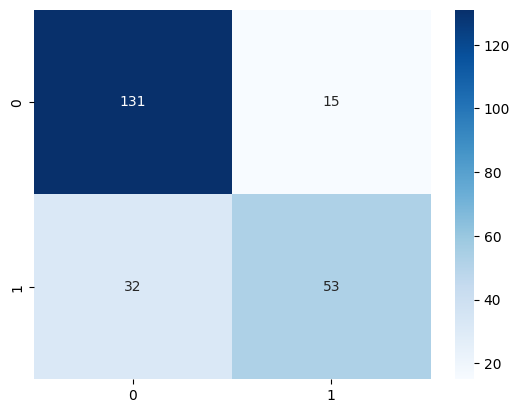

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report)

data=pd.read_csv('/content/diabetes.csv')
data=pd.DataFrame(data)
print(data.shape)
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=1)


#randomforest
model=RandomForestClassifier()

model.fit(x_train,y_train)
xtep=model.predict(x_test)

# test model evaluvation
ans=classification_report(y_test, xtep)
print(ans)
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
plt.show()

extracting features


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature: 0, Score: 0.08369
Feature: 1, Score: 0.23790
Feature: 2, Score: 0.09841
Feature: 3, Score: 0.07119
Feature: 4, Score: 0.07834
Feature: 5, Score: 0.17085
Feature: 6, Score: 0.12234
Feature: 7, Score: 0.13728


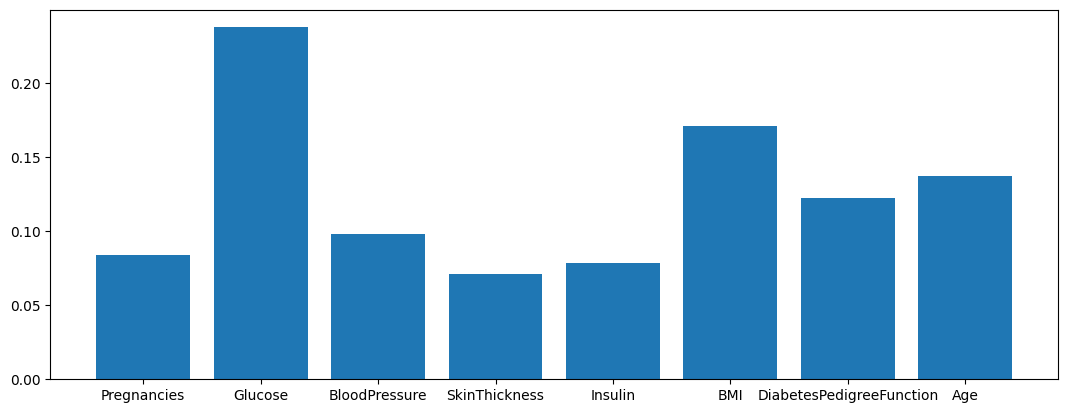

In [33]:
from matplotlib import pyplot
# get importance
column_names=list(data.columns.values)[:-1]
print(column_names)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure().set_figwidth(13)
pyplot.bar([x for x in column_names], importance)
pyplot.show()

0 --> Non-Diabetic

1 --> Diabetic

After extracting acc-78

(768, 4)
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.73      0.66      0.69        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



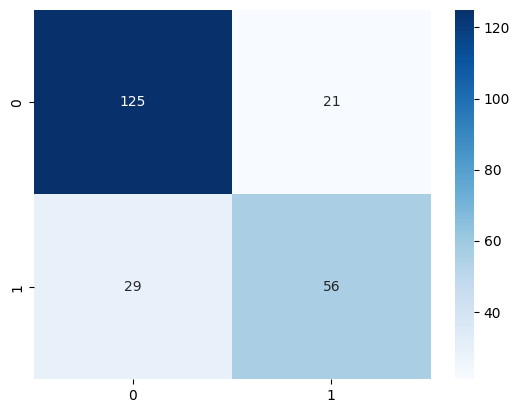

In [37]:
#glucose,bmi,age
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import (confusion_matrix,classification_report)
import seaborn as sns
data=pd.read_csv('/content/editedD.csv')
data=pd.DataFrame(data)

print(data.shape)
x=data.drop(columns='Outcome',axis=1)
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)
xtep=model.predict(x_test)

# test model evaluvation
ans=classification_report(y_test, xtep)
print(ans)
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
pyplot.show()

RESULT

In [4]:
a=(139,27.1,57)
anp=np.asarray(a)
r=anp.reshape(1,-1)
p=model.predict(r)
print(p[0])
if p[0]==0:
  print("The person is not diabetic")
else:
  print("The person is diabetic")

0
The person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


SMOTE

In [49]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your  )
# from imblearn.over_sampling import SMOTE
# sm=SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(x_train,y_train)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(x_train,y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))



Before OverSampling, counts of label '1': 183
Before OverSampling, counts of label '0': 354 

Before OverSampling, the shape of train_X: (537, 3)
Before OverSampling, the shape of train_y: (537,) 

After OverSampling, the shape of train_X: (708, 3)
After OverSampling, the shape of train_y: (708,) 

After OverSampling, counts of label '1': 354
After OverSampling, counts of label '0': 354


AFTER SMORT ACC-75

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       146
           1       0.68      0.74      0.71        85

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231



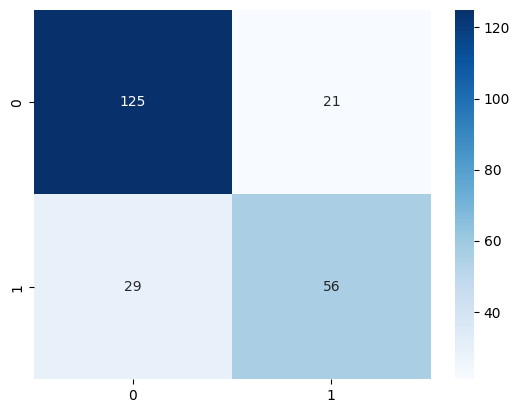

In [50]:
lr1 = RandomForestClassifier()
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
pyplot.show()

NearMiss


In [39]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(x_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 183
Before Undersampling, counts of label '0': 354 

After Undersampling, the shape of train_X: (366, 3)
After Undersampling, the shape of train_y: (366,) 

After Undersampling, counts of label '1': 183
After Undersampling, counts of label '0': 183


              precision    recall  f1-score   support

           0       0.88      0.78      0.83       146
           1       0.69      0.82      0.75        85

    accuracy                           0.80       231
   macro avg       0.78      0.80      0.79       231
weighted avg       0.81      0.80      0.80       231



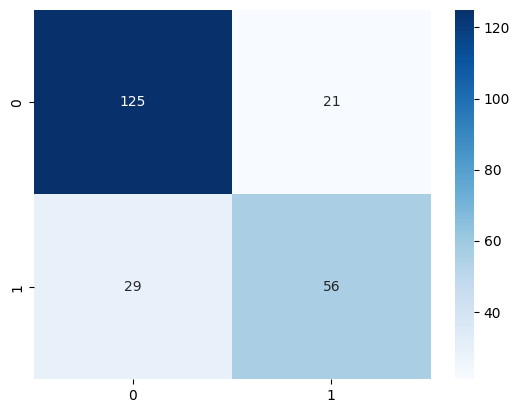

In [40]:
lr1 = RandomForestClassifier()
lr1.fit(X_train_res,y_train_res)
predictions = lr1.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))
c=confusion_matrix(y_test,xtep)
sns.heatmap(c,annot=True, fmt="d", cmap="Blues")
pyplot.show()